# Scipy

## Curve fitting

First we need to import required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

Here we define our 1-d function with three parameters _a, b, c_

In [2]:
def fun(x, a, b, c):
    return a * np.sin(b * x) + c

We set initial values for the parameters, calculate _y_ values and add some noise

In [3]:
a = 2.5
b = 1.3
c = 0.5
x = np.linspace(-10, 10)
y = fun(x, a, b, c) + np.array([np.random.random() for _ in range(len(x))])

Finally, we use `curve_fit` to reconstruct the input parameters. `xplot` will be used to plot smoother curve.

[ 2.51650372  1.30121327  1.02227512]


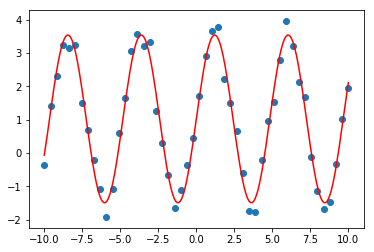

In [4]:
xplot = np.linspace(-10, 10, 200)
pars, pcov = curve_fit(fun, x, y)
plt.scatter(x, y)
plt.plot(xplot, fun(xplot, *pars), '-r')
print(pars)

### Gravitational microlensing

Sample data from OGLE can was downloaded from [http://ogle.astrouw.edu.pl/ogle4/ews/2016/blg-0018.html](http://ogle.astrouw.edu.pl/ogle4/ews/2016/blg-0018.html)

In [5]:
def model(t, p, t_max, t_e, s_0):
    # eq. 2.89 and 2.90 from Schneider Extragalctic Astronomy and Cosmology
    y = np.sqrt(p ** 2 + ((t - t_max) / t_e) ** 2)
    a = (y ** 2 + 2) / (y * np.sqrt(y ** 2 + 4))
    return 2.5 * np.log10(a) + s_0


In [6]:
x, y, _, _, _ = np.loadtxt("phot.dat", unpack=True)
x -= 2400000.5

[  3.81316194e-01   5.63378055e+04   7.00000000e+01  -1.86304301e+01]


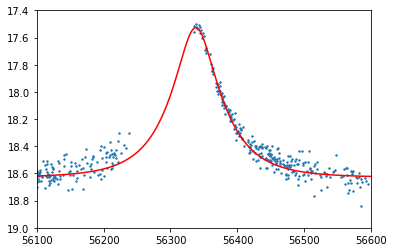

In [7]:
pars, cov = curve_fit(model, 
                      x, 
                      -y, 
                      p0=(0.4, 56340, 64, -18.6),
                      bounds=((0.3, 56300, 50, -29),
                              (0.5, 56400, 70, -18))
                     )

xplot = np.linspace(56000, 57000, 1000)
plt.scatter(x, y, s=2);
plt.plot(xplot, -model(xplot, *pars), '-r');
plt.xlim(56100, 56600);
plt.ylim(19, 17.4);
print(pars)